In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Food_Inspections.csv')

# EDA

---

**Funciones auxiliares**

In [67]:
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

In [3]:
def fast_describe(df, vartype = 'category'):
    """
    Profiling para cualquier tipo de variable 
    
    :df: DataFrame a analizar
    :vartype: Tipo de las variables que se quiere analizar
    """
    
    cat = df.select_dtypes('category')
    obj = df.select_dtypes(np.object)
    num = df.select_dtypes(np.number)
    dt = df.select_dtypes('datetime')
   
    
    if vartype== 'category': 
    # categoricas  / object  
        for i in range(0,len(cat.columns)):
            print("Variable:", cat.columns[i])
            print("Número de registros únicos/categorías:",len(cat.iloc[:,i].unique())) 
            print("Porcentaje de valores nulos:", sum(pd.isnull(cat.iloc[:,1]))/len(cat.iloc[:,1]))
            print("Moda: ", cat.iloc[:,i].mode())
            print("Distribución:")
            print(cat.iloc[:,i].value_counts()/ len(cat.iloc[:,i]),"\n")
            
    if vartype== 'numeric':
    # Numericas    
        for i in range(0,len(num.columns)):
            print("Variable:", num.columns[i])
            print(num.iloc[:,i].describe(),)
            print("Número de registros únicos:", len(num.iloc[:,i].unique()))
            print("Porcentaje de valores nulos:", sum(pd.isna(num.iloc[:,i]))/len(num.iloc[:,i]),"\n")
            
    if vartype== 'object': 
    # object  
        for i in range(0,len(obj.columns)):
            print("Variable:", cat.columns[i])
            print("Número de registros únicos/categorías:",len(obj.iloc[:,i].unique())) 
            print("Porcentaje de valores nulos:", sum(pd.isna(obj.iloc[:,1]))/len(obj.iloc[:,1]),"\n")
            

   
    if vartype== 'datetime':
        for i in range(0,len(dt.columns)):
            print("Variable:", dt.columns[i])
            print("Resumen:",dt.iloc[:,i].describe(datetime_is_numeric=True),"\n")


¿Cuántas variables tenemos inicialmente?

In [4]:
len(df.columns)

17

¿Cuántas observaciones tenemos inicialmente? (19-enero-2021)

In [5]:
len(df)

215130

Veamos los primeros 3 y los últimos 3 datos que tenemos en la base de datos:

In [6]:
df.head(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"


In [7]:
df.tail(3)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
215127,164305,PANDA EXPRESS #1422,PANDA EXPRESS #1422,1938611.0,Restaurant,Risk 1 (High),1654 W 119th ST,CHICAGO,IL,60643.0,02/01/2010,Canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.677617,-87.663113,"(-87.66311314586792, 41.67761705588747)"
215128,158331,DELA LUZ SUPERMERCADO,DELA LUZ SUPERMERCADO,20921.0,Grocery Store,Risk 1 (High),4400 S HONORE ST,CHICAGO,IL,60609.0,02/19/2010,Canvass,Fail,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.813911,-87.671327,"(-87.67132698995246, 41.81391135944083)"
215129,67853,METROPOLITAN FAMILY SERVICES MIDWAY CHILDCARE ...,METROPOLITAN FAMILY SERVICES MIDWAY CHILDCARE ...,1443260.0,Daycare Above and Under 2 Years,Risk 1 (High),3215 W 63RD ST,CHICAGO,IL,60629.0,01/12/2010,Canvass,Pass,NaN,41.778853,-87.703781,"(-87.70378111914683, 41.7788532281178)"


---

## Valores falttantes

In [8]:
missings_prop = df.apply(lambda x: round(x.isnull().sum()/df.shape[0]*100, 2))
missings_numeric_df = pd.DataFrame({'Proporción de valores faltantes': missings_prop})
missings_numeric_df

,Proporción de valores faltantes
Inspection ID,0.00
DBA Name,0.00
AKA Name,1.16
License #,0.01
Facility Type,2.27
Risk,0.03
Address,0.00
City,0.07
State,0.02
Zip,0.02


---

## Transformación de variables

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215130 entries, 0 to 215129
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    215130 non-null  int64  
 1   DBA Name         215130 non-null  object 
 2   AKA Name         212643 non-null  object 
 3   License #        215113 non-null  float64
 4   Facility Type    210238 non-null  object 
 5   Risk             215061 non-null  object 
 6   Address          215130 non-null  object 
 7   City             214972 non-null  object 
 8   State            215080 non-null  object 
 9   Zip              215078 non-null  float64
 10  Inspection Date  215130 non-null  object 
 11  Inspection Type  215129 non-null  object 
 12  Results          215130 non-null  object 
 13  Violations       157683 non-null  object 
 14  Latitude         214420 non-null  float64
 15  Longitude        214420 non-null  float64
 16  Location         214420 non-null  obje

In [10]:
df['DBA Name']= df['DBA Name'].astype('category')
df['AKA Name']= df['AKA Name'].astype('category')
df['Facility Type']= df['Facility Type'].astype('category')
df['Risk']= df['Risk'].astype('category')
df['Address']= df['Address'].astype('category')
df['City']= df['City'].astype('category')
df['State']= df['State'].astype('category')
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'], infer_datetime_format=True)
df['Inspection Type']= df['Inspection Type'].astype('category')
df['Results']= df['Results'].astype('category')
df['Violations']= df['Violations'].astype('category')

In [11]:
fast_describe(df, "category")

Variable: DBA Name
Número de registros únicos/categorías: 28753
Porcentaje de valores nulos: 0.01156045181982987
Moda:  0    SUBWAY
Name: DBA Name, dtype: category
Categories (28753, object): ['#1 CHINA EXPRESS, LTD.', '#1 CHOP SUEY', '#1 CHOP SUEY RESTAURANT', '#1 CHOP SUEY RESTAURANT, INC', ..., 'subway restaurant 1', 'tien giang restaurant', 'unknown', 'vitino pizzeria']
Distribución:
SUBWAY                          0.013517
DUNKIN DONUTS                   0.007335
MCDONALD'S                      0.002854
7-ELEVEN                        0.002180
MCDONALDS                       0.001599
                                  ...   
IRVING FOOD MART                0.000005
IRVING FOOD,INC                 0.000005
STARR'S FAST FOOD RESTAURANT    0.000005
IRVING LONG LIQUORS & FOODS     0.000005
vitino pizzeria                 0.000005
Name: DBA Name, Length: 28753, dtype: float64 

Variable: AKA Name
Número de registros únicos/categorías: 27361
Porcentaje de valores nulos: 0.011560451819829

In [12]:
fast_describe(df, 'datetime')

Variable: Inspection Date
Resumen: count                           215130
mean     2015-06-07 22:40:13.521126400
min                2010-01-04 00:00:00
25%                2012-11-20 00:00:00
50%                2015-06-24 00:00:00
75%                2017-11-16 00:00:00
max                2021-01-15 00:00:00
Name: Inspection Date, dtype: object 



In [13]:
fast_describe(df, 'numeric')

Variable: Inspection ID
count    2.151300e+05
mean     1.528870e+06
std      6.614742e+05
min      4.424700e+04
25%      1.188711e+06
50%      1.528174e+06
75%      2.104620e+06
max      2.472776e+06
Name: Inspection ID, dtype: float64
Número de registros únicos: 215130
Porcentaje de valores nulos: 0.0 

Variable: License #
count    2.151130e+05
mean     1.630342e+06
std      9.027653e+05
min      0.000000e+00
25%      1.247748e+06
50%      1.992224e+06
75%      2.278360e+06
max      9.999999e+06
Name: License #, dtype: float64
Número de registros únicos: 39112
Porcentaje de valores nulos: 7.902198670571282e-05 

Variable: Zip
count    215078.000000
mean      60628.759227
std         116.778081
min       10014.000000
25%       60614.000000
50%       60625.000000
75%       60643.000000
max       60827.000000
Name: Zip, dtype: float64
Número de registros únicos: 113
Porcentaje de valores nulos: 0.00024171431227629805 

Variable: Latitude
count    214420.000000
mean         41.880910
std 

---

## Gráfica

In [91]:
establecimientos = df.groupby(['Facility Type'],as_index=False)['Inspection ID'].count()\
.rename(columns={"Inspection ID": 'n'}) 

In [92]:
establecimientos = establecimientos[establecimientos['n']>=200].sort_values('n', ascending = True)

Tenemos 501 distintas categorías, seleccionaremos las categorías que tengan al menos 200 observaciones con ese *Facility Type*. 200 observaciones representan .09% del total de observaciones y considerando estos establecimientos tenemos 205667 observaciones que son aproximadamente el 95% del total de los datos.

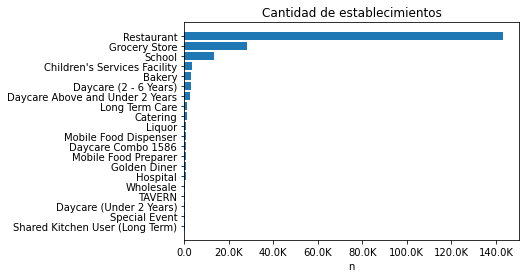

In [94]:
fig, ax = plt.subplots()
ax.xaxis.set_major_formatter(number_formatter)
ax.set_title('Cantidad de establecimientos')
plt.barh(establecimientos['Facility Type'], establecimientos['n'])
ax.set_xlabel('n')
plt.FuncFormatter(number_formatter)
plt.show()

Los restaurantes son los establecimientos con más observaciones, seguido de tiendas de abarrotes y escuelas, después de estas tres categorías las siguientes cuentan con un número relativamente pequeño de observaciones pero observamos establecimientos como panaderías, guarderías y banqueterías